In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import glob




In [3]:
!pwd

/home/bjogro/data-science-template/notebooks


In [4]:
df = pd.read_csv('/home/bjogro/data-science-template/data/trafikkdata_hourly_30552V444220.csv')

In [5]:
df.head()

,node.to,trafikk_id,total.volumeNumbers.volume,"total.volumeNumbers.volume[5.6,..)","total.volumeNumbers.volume[5.6,7.6)","total.volumeNumbers.volume[7.6,12.5)","total.volumeNumbers.volume[12.5,16.0)","total.volumeNumbers.volume[16.0,24.0)","total.volumeNumbers.volume[24.0,..)"
0,2019-01-01T02:00:00+01:00,30552V444220,709.0,7.0,2.0,2.0,3.0,0.0,0.0
1,2019-01-01T03:00:00+01:00,30552V444220,466.0,13.0,7.0,1.0,2.0,3.0,0.0
2,2019-01-01T04:00:00+01:00,30552V444220,225.0,4.0,2.0,0.0,1.0,0.0,1.0
3,2019-01-01T05:00:00+01:00,30552V444220,205.0,17.0,5.0,1.0,8.0,3.0,0.0
4,2019-01-01T06:00:00+01:00,30552V444220,184.0,26.0,1.0,6.0,10.0,8.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   node.to                                8760 non-null   object 
 1   trafikk_id                             8760 non-null   object 
 2   total.volumeNumbers.volume             8758 non-null   float64
 3   total.volumeNumbers.volume[5.6,..)     8758 non-null   float64
 4   total.volumeNumbers.volume[5.6,7.6)    8758 non-null   float64
 5   total.volumeNumbers.volume[7.6,12.5)   8758 non-null   float64
 6   total.volumeNumbers.volume[12.5,16.0)  8758 non-null   float64
 7   total.volumeNumbers.volume[16.0,24.0)  8758 non-null   float64
 8   total.volumeNumbers.volume[24.0,..)    8758 non-null   float64
dtypes: float64(7), object(2)
memory usage: 616.1+ KB


In [7]:
df['node.to'] = pd.to_datetime(df['node.to'], utc=True)



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   node.to                                8760 non-null   datetime64[ns, UTC]
 1   trafikk_id                             8760 non-null   object             
 2   total.volumeNumbers.volume             8758 non-null   float64            
 3   total.volumeNumbers.volume[5.6,..)     8758 non-null   float64            
 4   total.volumeNumbers.volume[5.6,7.6)    8758 non-null   float64            
 5   total.volumeNumbers.volume[7.6,12.5)   8758 non-null   float64            
 6   total.volumeNumbers.volume[12.5,16.0)  8758 non-null   float64            
 7   total.volumeNumbers.volume[16.0,24.0)  8758 non-null   float64            
 8   total.volumeNumbers.volume[24.0,..)    8758 non-null   float64            
dtypes: dateti

In [9]:
type(df['node.to'].iloc[1])


pandas._libs.tslibs.timestamps.Timestamp

In [10]:
24*365

8760

In [11]:
df.isnull().sum().sum()

14

In [12]:
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8758 entries, 0 to 8759
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   node.to                                8758 non-null   datetime64[ns, UTC]
 1   trafikk_id                             8758 non-null   object             
 2   total.volumeNumbers.volume             8758 non-null   float64            
 3   total.volumeNumbers.volume[5.6,..)     8758 non-null   float64            
 4   total.volumeNumbers.volume[5.6,7.6)    8758 non-null   float64            
 5   total.volumeNumbers.volume[7.6,12.5)   8758 non-null   float64            
 6   total.volumeNumbers.volume[12.5,16.0)  8758 non-null   float64            
 7   total.volumeNumbers.volume[16.0,24.0)  8758 non-null   float64            
 8   total.volumeNumbers.volume[24.0,..)    8758 non-null   float64            
dtypes: dateti

In [14]:
df.isnull().sum().sum()

0

In [15]:
df.iloc[4264]

node.to                                  2019-06-27 19:00:00+00:00
trafikk_id                                            30552V444220
total.volumeNumbers.volume                                  1827.0
total.volumeNumbers.volume[5.6,..)                           348.0
total.volumeNumbers.volume[5.6,7.6)                           79.0
total.volumeNumbers.volume[7.6,12.5)                         111.0
total.volumeNumbers.volume[12.5,16.0)                         53.0
total.volumeNumbers.volume[16.0,24.0)                         97.0
total.volumeNumbers.volume[24.0,..)                            8.0
Name: 4266, dtype: object

In [16]:
df = df.set_index('node.to')

In [47]:
df_week = df.resample('D').sum()

In [48]:
df['node.to'].dt.isocalendar().week

KeyError: 'node.to'

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

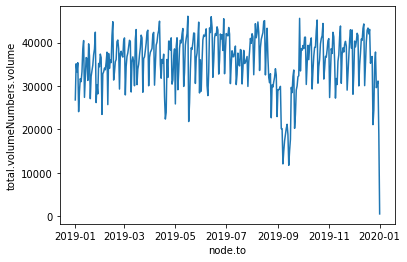

In [52]:
sns.lineplot(data=df_week, x='node.to', y='total.volumeNumbers.volume')

In [21]:
df.index.dayofweek.unique()

Int64Index([1, 2, 3, 4, 5, 6, 0], dtype='int64', name='node.to')

In [22]:
df['dayofweek'] = df.index.dayofweek

In [23]:
df.head()

,trafikk_id,total.volumeNumbers.volume,"total.volumeNumbers.volume[5.6,..)","total.volumeNumbers.volume[5.6,7.6)","total.volumeNumbers.volume[7.6,12.5)","total.volumeNumbers.volume[12.5,16.0)","total.volumeNumbers.volume[16.0,24.0)","total.volumeNumbers.volume[24.0,..)",dayofweek
node.to,,,,,,,,,
2019-01-01 01:00:00+00:00,30552V444220,709.0,7.0,2.0,2.0,3.0,0.0,0.0,1
2019-01-01 02:00:00+00:00,30552V444220,466.0,13.0,7.0,1.0,2.0,3.0,0.0,1
2019-01-01 03:00:00+00:00,30552V444220,225.0,4.0,2.0,0.0,1.0,0.0,1.0,1
2019-01-01 04:00:00+00:00,30552V444220,205.0,17.0,5.0,1.0,8.0,3.0,0.0,1
2019-01-01 05:00:00+00:00,30552V444220,184.0,26.0,1.0,6.0,10.0,8.0,1.0,1


<AxesSubplot:xlabel='node.to', ylabel='total.volumeNumbers.volume'>

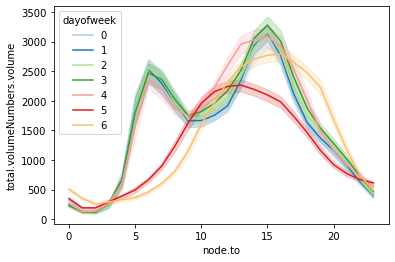

In [24]:
#palette = {
#    0: 'tab:blue',
#    1: 'tab:green',
#    2: 'tab:orange',
#    3: 'tab:red',
#    4: 'tab:pink',
#    5: 'tab:gist_rainbow',
#    6: 'tab:indigo',
#    
#}
palette=sns.color_palette('Paired', n_colors=7)
#sns.set_style('gist_rainbow')
#sns.set_palette(sns.color_palette("Greens"))
sns.lineplot(x=df.index.hour, y=df['total.volumeNumbers.volume'], palette=palette, hue=df['dayofweek'])


In [25]:
df_dagmean = df.resample('').mean()

ValueError: Invalid frequency: 

In [ ]:
sns.lineplot(data=df, x='dayofweek', y='total.volumeNumbers.volume')

Import av resten av filene

In [26]:
# slår sammen alle csv filene som vi har fått.
filer_fra_tellepunkt = glob.glob('/home/bjogro/data-science-template/data/*.csv')

df_fra_hvert_tellepunkt = (pd.read_csv(f, sep=',') for f in filer_fra_tellepunkt)
df_total   = pd.concat(df_fra_hvert_tellepunkt, ignore_index=True)
del df_fra_hvert_tellepunkt

In [27]:
df_total['trafikk_id'].unique()

array(['30552V444220', '67263V1811577', '73894V444221', '79854V625215',
       '87610V1811579'], dtype=object)

dvs at det er 2733 linjer som ikke har tellinger i seg.  Dette kan væer ett problem

In [29]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41781 entries, 0 to 41780
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   node.to                                41781 non-null  object 
 1   trafikk_id                             41781 non-null  object 
 2   total.volumeNumbers.volume             39048 non-null  float64
 3   total.volumeNumbers.volume[5.6,..)     39048 non-null  float64
 4   total.volumeNumbers.volume[5.6,7.6)    39048 non-null  float64
 5   total.volumeNumbers.volume[7.6,12.5)   39048 non-null  float64
 6   total.volumeNumbers.volume[12.5,16.0)  39048 non-null  float64
 7   total.volumeNumbers.volume[16.0,24.0)  39048 non-null  float64
 8   total.volumeNumbers.volume[24.0,..)    39048 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.9+ MB


In [30]:
#gjør om node.to til et pandas datetime format
df_total['node.to'] = pd.to_datetime(df_total['node.to'], utc=True)

In [31]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41781 entries, 0 to 41780
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype              
---  ------                                 --------------  -----              
 0   node.to                                41781 non-null  datetime64[ns, UTC]
 1   trafikk_id                             41781 non-null  object             
 2   total.volumeNumbers.volume             39048 non-null  float64            
 3   total.volumeNumbers.volume[5.6,..)     39048 non-null  float64            
 4   total.volumeNumbers.volume[5.6,7.6)    39048 non-null  float64            
 5   total.volumeNumbers.volume[7.6,12.5)   39048 non-null  float64            
 6   total.volumeNumbers.volume[12.5,16.0)  39048 non-null  float64            
 7   total.volumeNumbers.volume[16.0,24.0)  39048 non-null  float64            
 8   total.volumeNumbers.volume[24.0,..)    39048 non-null  float64            
dtypes: date

In [32]:
type(df_total['total.volumeNumbers.volume'].iloc[1])

numpy.float64

In [33]:
# setter node.to som index for dataframe
df_total = df_total.set_index('node.to')

In [34]:
df_total.index.dayofweek.unique()

Int64Index([1, 2, 3, 4, 5, 6, 0], dtype='int64', name='node.to')

In [35]:
df_total['dayofweek'] = df_total.index.dayofweek

In [36]:
df_total[df_total['dayofweek'] == 1]

,trafikk_id,total.volumeNumbers.volume,"total.volumeNumbers.volume[5.6,..)","total.volumeNumbers.volume[5.6,7.6)","total.volumeNumbers.volume[7.6,12.5)","total.volumeNumbers.volume[12.5,16.0)","total.volumeNumbers.volume[16.0,24.0)","total.volumeNumbers.volume[24.0,..)",dayofweek
node.to,,,,,,,,,
2019-01-01 01:00:00+00:00,30552V444220,709.0,7.0,2.0,2.0,3.0,0.0,0.0,1
2019-01-01 02:00:00+00:00,30552V444220,466.0,13.0,7.0,1.0,2.0,3.0,0.0,1
2019-01-01 03:00:00+00:00,30552V444220,225.0,4.0,2.0,0.0,1.0,0.0,1.0,1
2019-01-01 04:00:00+00:00,30552V444220,205.0,17.0,5.0,1.0,8.0,3.0,0.0,1
2019-01-01 05:00:00+00:00,30552V444220,184.0,26.0,1.0,6.0,10.0,8.0,1.0,1
...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,87610V1811579,127.0,15.0,4.0,1.0,5.0,5.0,0.0,1
2019-12-31 20:00:00+00:00,87610V1811579,84.0,10.0,0.0,1.0,2.0,7.0,0.0,1
2019-12-31 21:00:00+00:00,87610V1811579,88.0,8.0,1.0,3.0,1.0,3.0,0.0,1


In [64]:
df_isnull = df_total.isnull()

In [37]:


g = sns.catplot(kind = 'line', y='total.volumeNumbers.volume', x= 'trafikk_id', data = df_total, hue = 'dayofweek')#[df_total['dayofweek'] == 6] )
#sns.set(rc={'figure.figsize':(11.7,40.27)})



g.fig.set_figwidth(30.27)
g.fig.set_figheight(11.7)

ValueError: Plot kind 'line' is not recognized

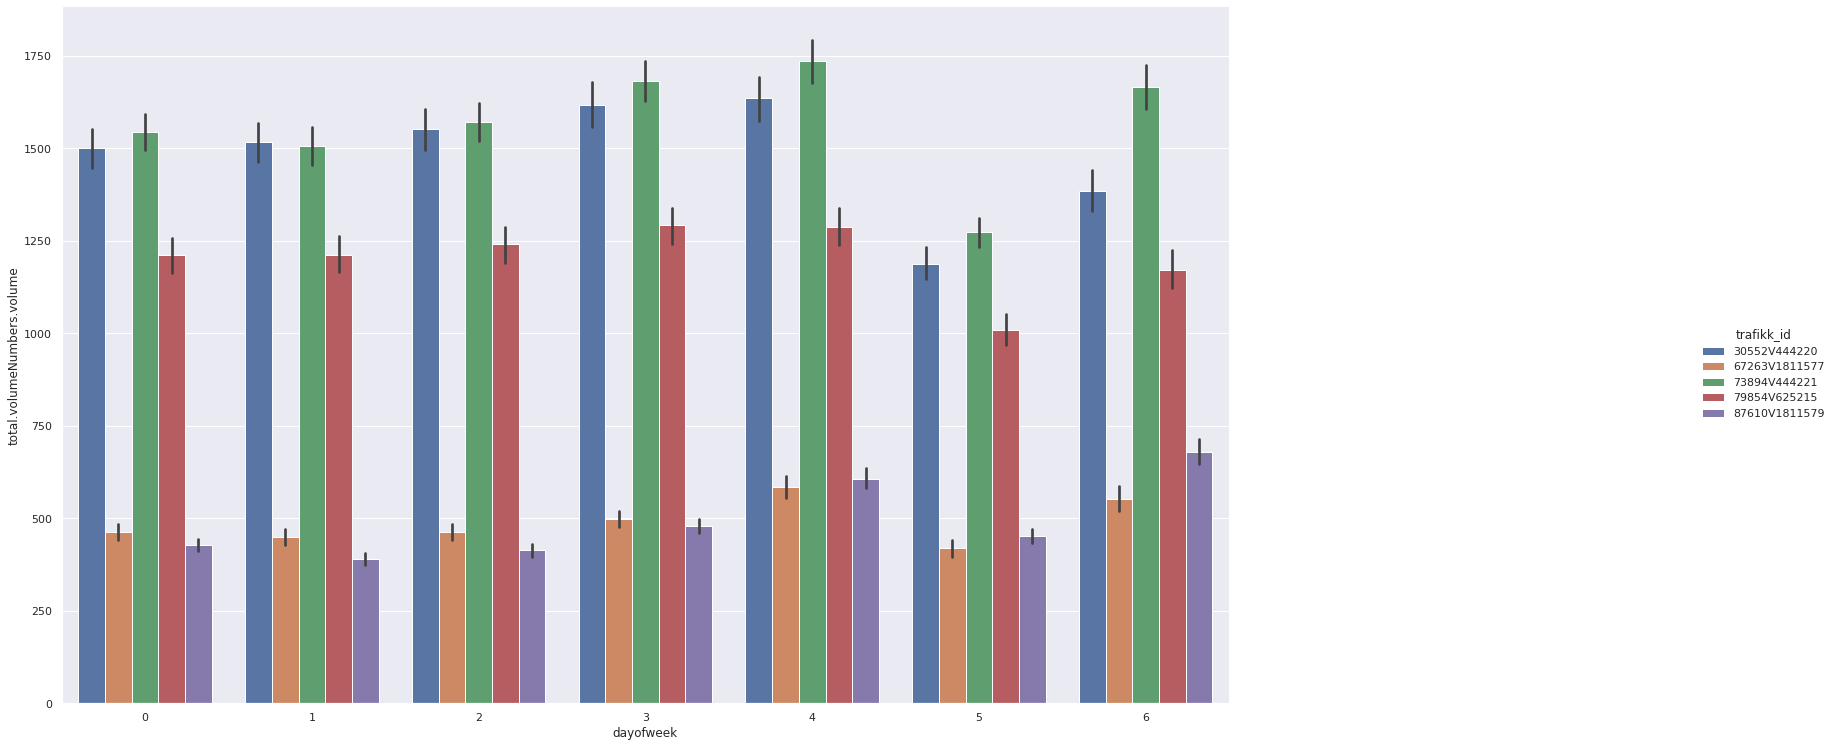

In [57]:
w = sns.catplot(kind = 'bar', y='total.volumeNumbers.volume', x= 'dayofweek', data = df_total, hue = 'trafikk_id')#[df_total['dayofweek'] == 6] )
#sns.set(rc={'figure.figsize':(11.7,40.27)})



w.fig.set_figwidth(30.27)
w.fig.set_figheight(11.7)

In [53]:
#palette=sns.color_palette('Paired', n_colors=7)

#b=sns.barplot(x=df_total.index, y=df_total['total.volumeNumbers.volume'], palette=palette, hue=df_total['trafikk_id'])
#b.fig.set_figwidth(30.27)
#b.fig.set_figheight(11.7)

,trafikk_id,total.volumeNumbers.volume,"total.volumeNumbers.volume[5.6,..)","total.volumeNumbers.volume[5.6,7.6)","total.volumeNumbers.volume[7.6,12.5)","total.volumeNumbers.volume[12.5,16.0)","total.volumeNumbers.volume[16.0,24.0)","total.volumeNumbers.volume[24.0,..)",dayofweek
node.to,,,,,,,,,
2019-01-01 01:00:00+00:00,False,False,False,False,False,False,False,False,False
2019-01-01 02:00:00+00:00,False,False,False,False,False,False,False,False,False
2019-01-01 03:00:00+00:00,False,False,False,False,False,False,False,False,False
2019-01-01 04:00:00+00:00,False,False,False,False,False,False,False,False,False
2019-01-01 05:00:00+00:00,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2019-12-31 20:00:00+00:00,False,False,False,False,False,False,False,False,False
2019-12-31 21:00:00+00:00,False,False,False,False,False,False,False,False,False
2019-12-31 22:00:00+00:00,False,False,False,False,False,False,False,False,False


In [65]:
df_isnull.index.strftime('%Y%m')

Index(['201901', '201901', '201901', '201901', '201901', '201901', '201901',
       '201901', '201901', '201901',
       ...
       '201912', '201912', '201912', '201912', '201912', '201912', '201912',
       '201912', '201912', '202001'],
      dtype='object', name='node.to', length=41781)

In [72]:
df_isnull.head()

,trafikk_id,total.volumeNumbers.volume,"total.volumeNumbers.volume[5.6,..)","total.volumeNumbers.volume[5.6,7.6)","total.volumeNumbers.volume[7.6,12.5)","total.volumeNumbers.volume[12.5,16.0)","total.volumeNumbers.volume[16.0,24.0)","total.volumeNumbers.volume[24.0,..)",dayofweek,YYYYMM
node.to,,,,,,,,,,
2019-01-01 01:00:00+00:00,False,False,False,False,False,False,False,False,False,201901
2019-01-01 02:00:00+00:00,False,False,False,False,False,False,False,False,False,201901
2019-01-01 03:00:00+00:00,False,False,False,False,False,False,False,False,False,201901
2019-01-01 04:00:00+00:00,False,False,False,False,False,False,False,False,False,201901
2019-01-01 05:00:00+00:00,False,False,False,False,False,False,False,False,False,201901


[Text(0, 0, '201901'),
 Text(1, 0, '201902'),
 Text(2, 0, '201903'),
 Text(3, 0, '201904'),
 Text(4, 0, '201905'),
 Text(5, 0, '201906'),
 Text(6, 0, '201907'),
 Text(7, 0, '201908'),
 Text(8, 0, '201909'),
 Text(9, 0, '201910'),
 Text(10, 0, '201911'),
 Text(11, 0, '201912'),
 Text(12, 0, '202001')]

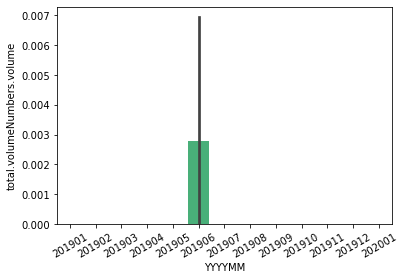

In [79]:
#plotter manglende registeringer for Leirelva bru punktet

df_isnull['trafikk_id'] = df_total['trafikk_id']
df_isnull['YYYYMM'] = df_isnull.index.strftime('%Y%m')
ax = sns.barplot(x='YYYYMM', y='total.volumeNumbers.volume', data = df_isnull.loc[df_isnull['trafikk_id'] == '30552V444220' ] )
#ax = sns.barplot(x='YYYYMM', y='total.volumeNumbers.volume', data = df_isnull.loc[df_isnull['trafikk_id'] == '67263V1811577' ] )

#df.loc[df['column_name'] == some_value]
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

[Text(0, 0, '201901'),
 Text(1, 0, '201902'),
 Text(2, 0, '201903'),
 Text(3, 0, '201904'),
 Text(4, 0, '201905'),
 Text(5, 0, '201906'),
 Text(6, 0, '201907'),
 Text(7, 0, '201908'),
 Text(8, 0, '201909'),
 Text(9, 0, '201910'),
 Text(10, 0, '201911'),
 Text(11, 0, '201912'),
 Text(12, 0, '202001')]

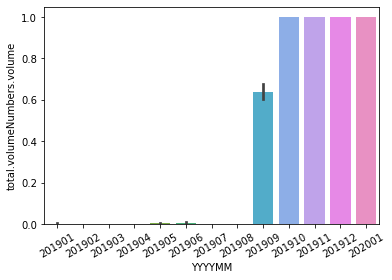

In [85]:
##plotter manglende registeringer for Mogriena punktet
ax = sns.barplot(x='YYYYMM', y='total.volumeNumbers.volume', data = df_isnull.loc[df_isnull['trafikk_id'] == '67263V1811577' ] )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)


[Text(0, 0, '201901'),
 Text(1, 0, '201902'),
 Text(2, 0, '201903'),
 Text(3, 0, '201904'),
 Text(4, 0, '201905'),
 Text(5, 0, '201906'),
 Text(6, 0, '201907'),
 Text(7, 0, '201908'),
 Text(8, 0, '201909'),
 Text(9, 0, '201910'),
 Text(10, 0, '201911'),
 Text(11, 0, '201912'),
 Text(12, 0, '202001')]

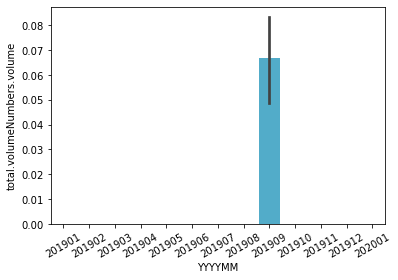

In [86]:
#plotter manglende registeringer for Jessheim punktet
ax = sns.barplot(x='YYYYMM', y='total.volumeNumbers.volume', data = df_isnull.loc[df_isnull['trafikk_id'] == '73894V444221' ] )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

[Text(0, 0, '201901'),
 Text(1, 0, '201902'),
 Text(2, 0, '201903'),
 Text(3, 0, '201904'),
 Text(4, 0, '201905'),
 Text(5, 0, '201906'),
 Text(6, 0, '201907'),
 Text(7, 0, '201908'),
 Text(8, 0, '201910'),
 Text(9, 0, '201911'),
 Text(10, 0, '201912'),
 Text(11, 0, '202001')]

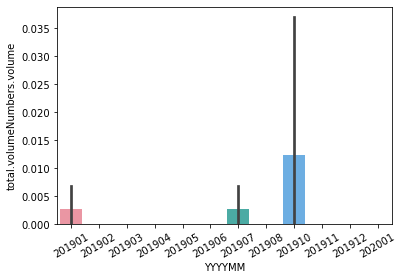

In [87]:
#plotter manglende registeringer for Karihaugen punktet
ax = sns.barplot(x='YYYYMM', y='total.volumeNumbers.volume', data = df_isnull.loc[df_isnull['trafikk_id'] == '79854V625215' ] )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

[Text(0, 0, '201901'),
 Text(1, 0, '201902'),
 Text(2, 0, '201903'),
 Text(3, 0, '201904'),
 Text(4, 0, '201905'),
 Text(5, 0, '201906'),
 Text(6, 0, '201907'),
 Text(7, 0, '201908'),
 Text(8, 0, '201909'),
 Text(9, 0, '201910'),
 Text(10, 0, '201911'),
 Text(11, 0, '201912'),
 Text(12, 0, '202001')]

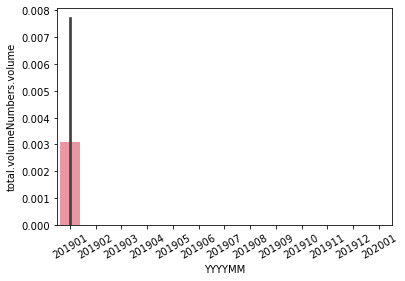

In [88]:
#plotter manglende registeringer for dalskrysset punktet
ax = sns.barplot(x='YYYYMM', y='total.volumeNumbers.volume', data = df_isnull.loc[df_isnull['trafikk_id'] == '87610V1811579' ] )
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)